<a href="https://colab.research.google.com/github/yahia-kplr/Statistics-With-Python_fr/blob/main/Solution/1_1_Echantillonnage_Solution.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Échantillonnage - Solution


Dans ce chapitre, nous avons discuté de certains problèmes fondamentaux liés à l'échantillonnage. Dans ce cahier, vous explorerez quelques méthodes python pratiques pour l'échantillonnage et examinerez les implications de l'échantillonnage sur ce que vous comprenez d'un groupe cible (c'est-à-dire ce que vous pouvez généraliser).


## Importation et utilisation de fonctions existantes


In [1]:
import numpy as np
import numpy.random as npr
import pandas as pd
import seaborn as sns

## Problème 0 : Amorçage d'un générateur de nombres aléatoires


Lorsque nous utilisons l'ordinateur pour jouer avec des nombres aléatoires (ou des échantillons aléatoires), nous n'utilisons pas réellement de nombres aléatoires. D'une manière générale, votre ordinateur est une machine déterministe, il est donc incapable de créer des nombres véritablement aléatoires. Au lieu de cela, les nombres que votre ordinateur vous donne sont appelés pseudo-aléatoires car ils possèdent de nombreuses propriétés que nous attendons des nombres aléatoires, mais ne sont pas exactement et entièrement aléatoires.

Chaque fois que nous utilisons des nombres aléatoires dans un script, une simulation ou une analyse, il est important de "semer" le générateur de nombres aléatoires. Cela a initialisé la fonction de générateur de nombres aléatoires à un "état" particulier, ce qui rend le nombre dans le script aléatoire mais répétable.

Essayons cela. Essayez d'abord d'exécuter la cellule suivante et de voir quelle est la sortie. Essayez de l'exécuter plusieurs fois et voyez comment les chiffres changent.


In [2]:
npr.randint(0,10,10)

array([6, 8, 0, 9, 7, 0, 5, 3, 1, 0])

Exécutez maintenant cette cellule :


In [3]:
npr.seed(10)
print(npr.randint(0,10,10))
print(npr.randint(0,10,10))

[9 4 0 1 9 0 1 8 9 0]
[8 6 4 3 0 4 6 8 1 8]


Encore une fois, essayez de répéter l'exécution de la cellule encore et encore. Qu'observez-vous ?

Essayez de redémarrer le noyau et exécutez à nouveau la cellule. Que remarquez-vous ? Comparez avec les autres personnes de votre groupe. Changez également l'argument en `npr.seed()` et voyez ce qui se passe.


#### Réponse 0 ici :


In [4]:
## Enter solution here
npr.seed(9)
print(npr.randint(0,10,10))
print(npr.randint(0,10,10))

[5 6 8 6 1 6 4 8 1 8]
[5 1 0 8 8 8 2 6 8 1]


En résumé : placez toujours le générateur de nombres aléatoires au début de tout script utilisant des nombres aléatoires afin que votre code soit plus reproductible.


## Problème 1 : Échantillonnage à partir d'une population finie

Imaginez que je crée une liste avec 100 valeurs déterminées au hasard comme ci-dessous. En utilisant le Web, recherchez la fonction numpy random `choice()`. Utilisez-le pour générer un échantillon aléatoire de taille 10 à partir de ces données. Faites-le deux fois, une fois avec remplacement et une fois sans remplacement.


In [5]:
my_data = np.array([75, 25, 59, 63, 48, 29,  3, 17, 68, 39,  9, 62, 61, 52, 64, 45, 90,
       87,  0, 42, 26, 52, 22, 25, 20, 22, 81, 25, 48, 79, 37,  6, 33, 30,
       81,  5, 37, 85, 65,  0, 27, 40, 96, 67, 77, 29, 32, 25,  4, 53, 46,
        7, 51, 65, 46, 91, 60, 52, 93, 26,  2, 42, 18, 19, 97, 45, 78, 33,
       25, 30, 97, 96, 99, 32, 86, 43, 81, 83, 51, 81, 36, 29,  2, 33, 95,
       39, 79,  1, 80, 17, 50, 38,  1, 98, 30, 89, 93, 27, 43, 30])

#### Réponse 1 ici :


In [6]:
## Enter solution here
print(npr.choice(my_data,size=10,replace=True))
print(npr.choice(my_data,size=10,replace=False))

[60 30 62 85 42 39 36 60 53 19]
[52 25 43 45 30  1 68  7 81 81]


## Problème 2 : Échantillonnage à partir d'un bloc de données


Parfois, ce qui nous intéresse, c'est l'échantillonnage à partir d'une base de données pandas plutôt qu'une liste ou un tableau numpy. Pourquoi pourrions-nous vouloir échantillonner à partir d'un ensemble de données ? L'une consiste à sélectionner au hasard un sous-ensemble de données, pour une répartition entre formation et test, si nous réalisons des projets d'apprentissage automatique sur les données (nous en reparlerons plus tard). Une autre est s'il y a trop d'enregistrements à analyser, il est donc logique de sélectionner au hasard un sous-ensemble et de les analyser. Une autre consiste à échantillonner à plusieurs reprises à partir d'un ensemble de données pour appliquer une méthode statistique appelée "boostrapping" (https://en.wikipedia.org/wiki/Bootstrapping_(statistics))


Ce code charge un exemple de jeu de données pandas de différents pingouins.


In [7]:
penguins_df = sns.load_dataset('penguins')

In [8]:
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [9]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Recherchez la méthode `sample()` des pandas et échantillonnez au hasard 20 pingouins à partir de la base de données.


#### Réponse 2a ici :


In [10]:
## Enter solution here
penguins_df.sample(n=20)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
329,Gentoo,Biscoe,48.1,15.1,209.0,5500.0,Male
190,Chinstrap,Dream,46.9,16.6,192.0,2700.0,Female
207,Chinstrap,Dream,52.2,18.8,197.0,3450.0,Male
255,Gentoo,Biscoe,48.4,16.3,220.0,5400.0,Male
268,Gentoo,Biscoe,44.9,13.3,213.0,5100.0,Female
224,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,Male
138,Adelie,Dream,37.0,16.5,185.0,3400.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
271,Gentoo,Biscoe,48.5,14.1,220.0,5300.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


Maintenant, pour la partie b de cette question, dans une boucle for, créez 100 fois un échantillon aléatoire de la base de données et calculez la masse corporelle moyenne des pingouins de votre échantillon. Ajoutez toutes ces valeurs à une liste, puis tracez un histogramme de ces valeurs (en utilisant `sns.displot`). Comparez-le à la moyenne de l'ensemble de données contenant tous les pingouins.


#### Réponse 2b ici :


Overall mean is  4201.754385964912


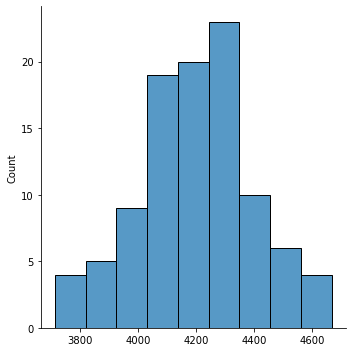

In [11]:
## Enter solution here
overall_mean = penguins_df['body_mass_g'].mean()

list_sample_mean = []
for i in range(100):
    sample_mean = penguins_df.sample(n=20)['body_mass_g'].mean()
    list_sample_mean.append(sample_mean)

sns.displot(list_sample_mean)
print("Overall mean is ", overall_mean)

## Problème 3 : Échantillonnage stratifié


Un problème avec les échantillons aléatoires simples que nous avons constitués de manchots est que dans chaque échantillon, nous pourrions exclure certains groupes importants de données. Par exemple, si nous n'avons échantillonné que 10 manchots, peut-être qu'ils sont tous des mâles. Si nous voulions être plus équitables, assurez-vous que nos échantillons étaient _représentatifs_ des différences entre les sexes, alors nous voudrions peut-être échantillonner à partir des sous-populations. C'est ce qu'on appelle "l'échantillonnage stratifié".

Veuillez lire cet exemple de page Web : https://www.statology.org/stratified-sampling-pandas/
sur un échantillonnage stratifié et adapter le code pour générer un échantillon aléatoire de 10 manchots qui est stratifié de sorte qu'il y ait 5 exemples mâles et 5 femelles dans l'échantillon


#### Problème 3 : Répondez ici


In [12]:
## Enter solution here
penguins_df.groupby('sex').sample(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
198,Chinstrap,Dream,50.1,17.9,190.0,3400.0,Female
108,Adelie,Biscoe,38.1,17.0,181.0,3175.0,Female
314,Gentoo,Biscoe,44.5,14.7,214.0,4850.0,Female
56,Adelie,Biscoe,39.0,17.5,186.0,3550.0,Female
82,Adelie,Torgersen,36.7,18.8,187.0,3800.0,Female
245,Gentoo,Biscoe,46.1,15.1,215.0,5100.0,Male
149,Adelie,Dream,37.8,18.1,193.0,3750.0,Male
267,Gentoo,Biscoe,50.5,15.9,225.0,5400.0,Male
259,Gentoo,Biscoe,48.7,15.7,208.0,5350.0,Male
229,Gentoo,Biscoe,46.8,15.4,215.0,5150.0,Male
